In [2]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate
import warnings
warnings.filterwarnings('ignore')


In [3]:
df = pd.read_csv('breast-cancer.csv')
                 
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
df.drop('id', axis=1, inplace=True) #drop redundant columns

In [5]:
df['diagnosis'] = (df['diagnosis'] == 'M').astype(int) #encode the label into 1/0
corr = df.corr()

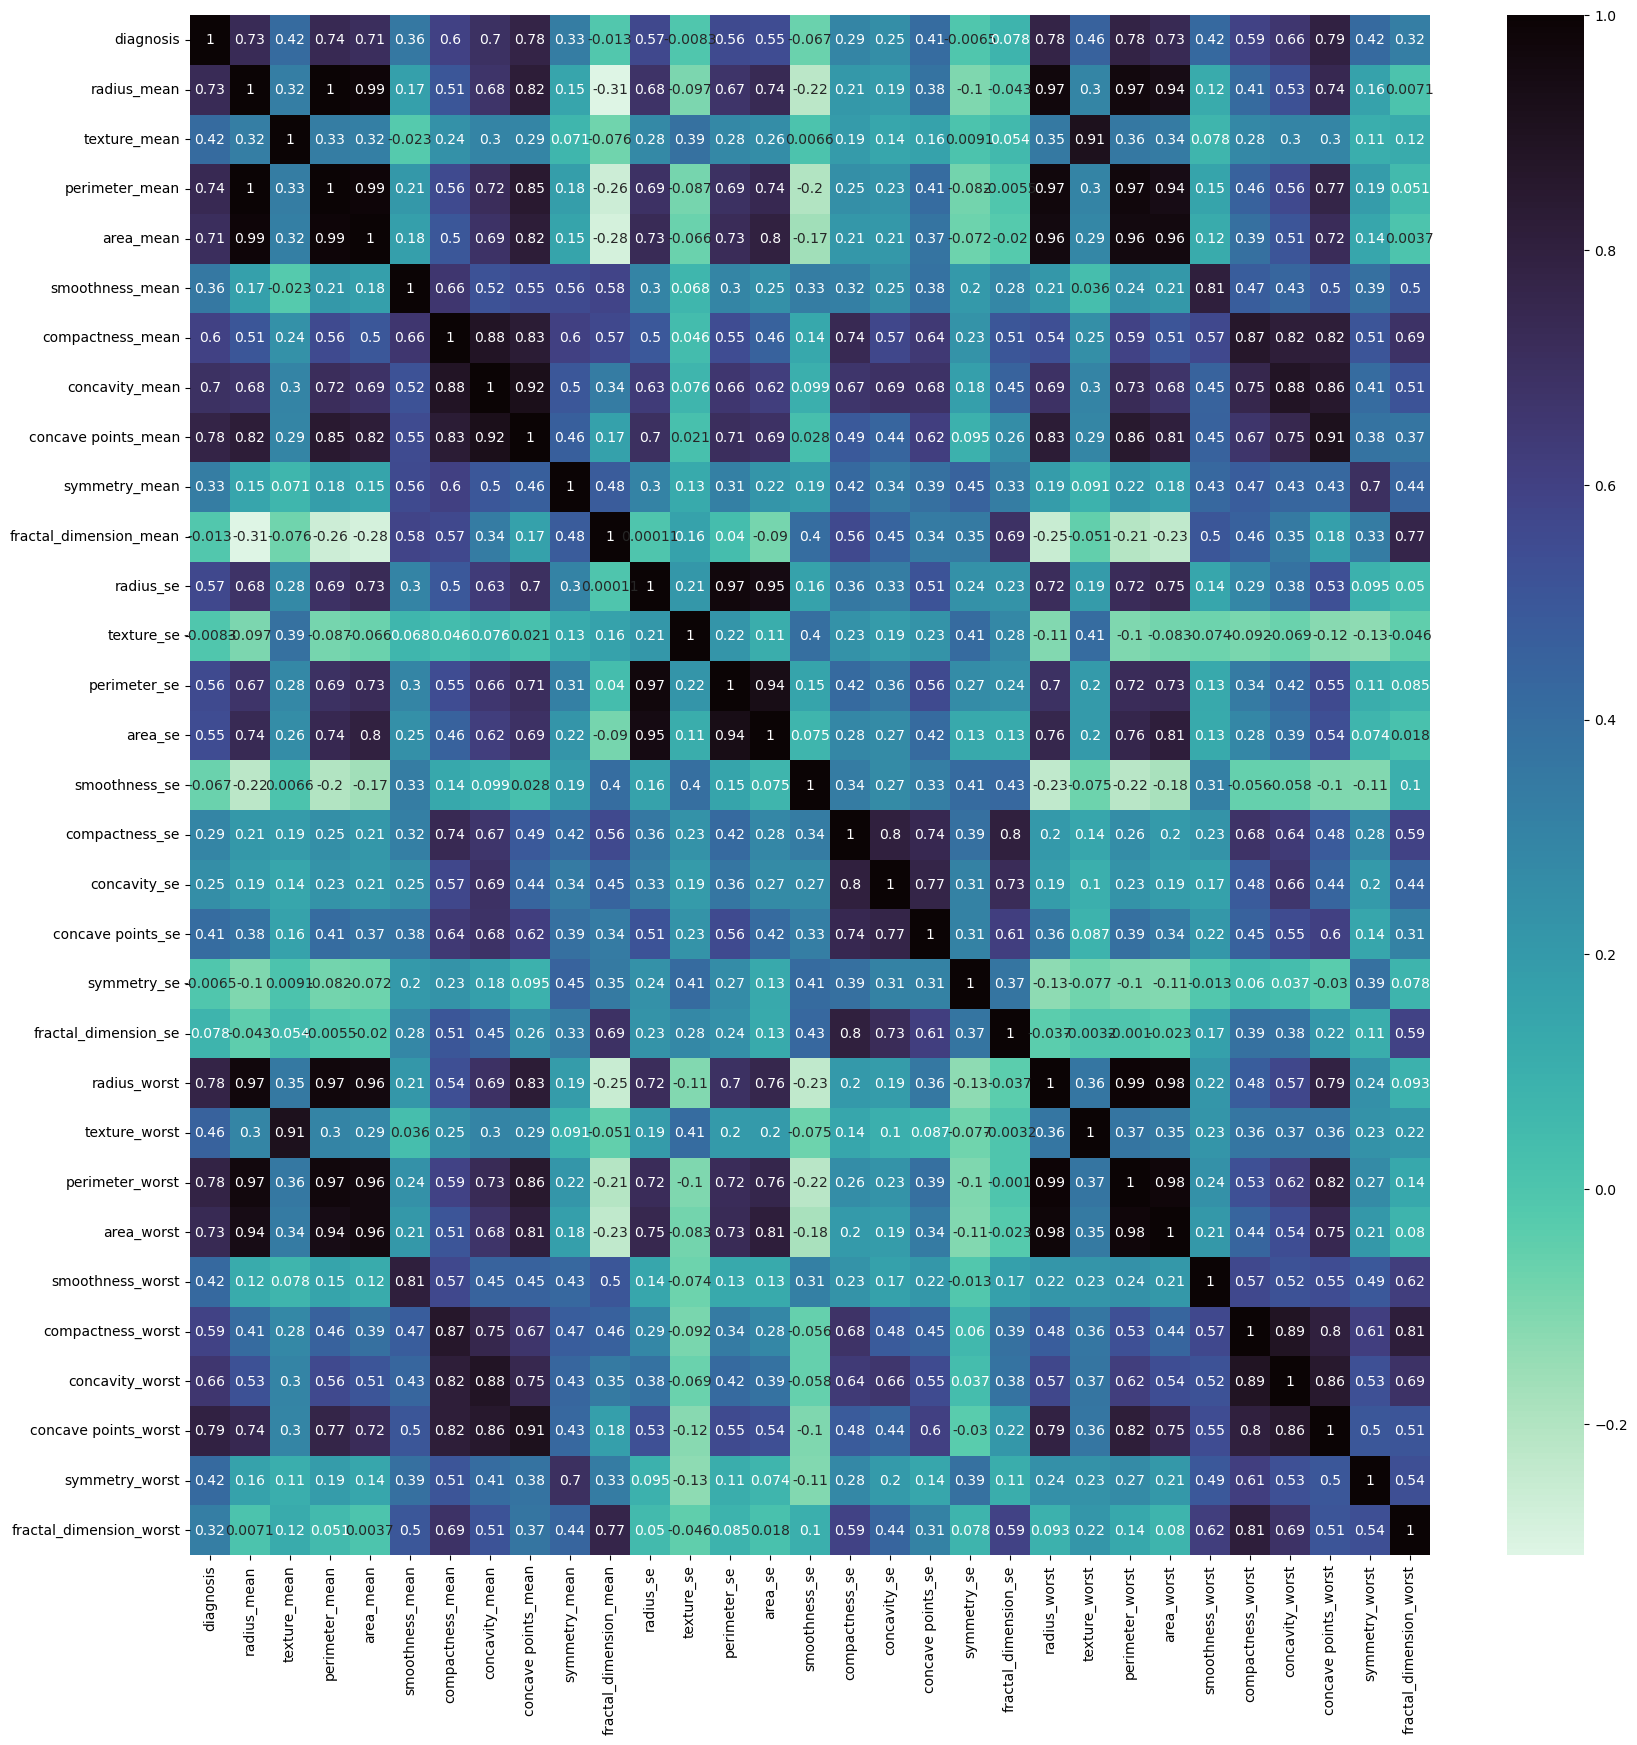

In [6]:
plt.figure(figsize=(20,20))
sns.heatmap(corr, cmap='mako_r',annot=True)
plt.show()

In [7]:
# Get the absolute values of the correlations with the target variable 'diagnosis'
cor_target = abs(corr["diagnosis"])

# Select features that have a correlation greater than 0.2 with the target
relevant_features = cor_target[cor_target > 0.2]

# Collect the names of the features
names = [index for index, value in relevant_features.items()]

# Remove 'diagnosis' from the list of features
names.remove('diagnosis')

# Display the names of the features that are relevant
print(names)

['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'radius_se', 'perimeter_se', 'area_se', 'compactness_se', 'concavity_se', 'concave points_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [8]:
X = df[names]
y = df['diagnosis']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42) #split the  data into traing and validating


**scale the data**

In [10]:
scaler = StandardScaler() #create an instance of standard scaler
scaler.fit(X_train) # fit it to the training data

X_train = scaler.transform(X_train) #transform training data
X_test = scaler.transform(X_test) #transform validation data


In [11]:
model = LogisticRegression() #create logistic regression instance

In [12]:
model.fit(X_train, y_train)  #fit the model instance 

LogisticRegression()

In [13]:
predictions = model.predict(X_test) # calculate predictions


Classification Report:
              precision    recall  f1-score   support

      Benign       0.97      0.99      0.98        71
   Malignant       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



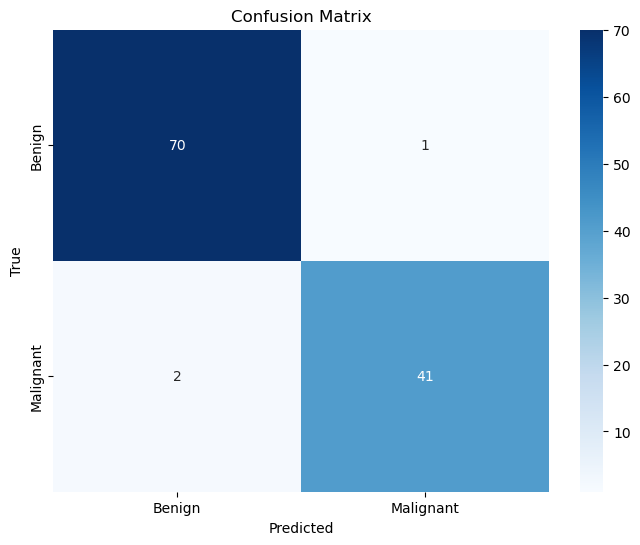

In [14]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

print("Classification Report:")
print(classification_report(y_test, predictions, target_names=['Benign', 'Malignant']))

# Plot confusion matrix
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [15]:
# Setup cross-validation
skf = StratifiedKFold(n_splits=5)
scoring = {'accuracy': 'accuracy',
           'precision': 'precision',
           'recall': 'recall',
           'roc_auc': 'roc_auc',
           'f1_score': 'f1'}

# Perform cross-validation and capture the metrics
cv_results = cross_validate(model, X, y, cv=skf, scoring=scoring, return_train_score=False)

# Display cross-validation results
print("Cross-Validation Metrics:")
for metric in cv_results.keys():
    if 'test_' in metric:
        print(f"{metric.split('_')[1].capitalize()}: {np.mean(cv_results[metric]):.2f}")


Cross-Validation Metrics:
Accuracy: 0.95
Precision: 0.95
Recall: 0.92
Roc: 0.99
F1: 0.93
